In [6]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [7]:
#os.listdir()
#os.getcwd()
os.chdir('/Users/rahuljain/Desktop/Python/Imarticus/priyansu')
df = pd.read_csv('loan.csv')
#df.head()

In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
df.isna().sum()
#df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df.isnull().T.any().sum()

134

In [11]:
##Before dropping null
df.shape

(614, 13)

In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(480, 13)

In [14]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [15]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [16]:
df.Loan_ID.nunique()

480

In [17]:
##Loan_ID is not a random variable so we drop it 


In [18]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [19]:
df.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [20]:
df.Education.value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [21]:
df.Self_Employed.value_counts()

No     414
Yes     66
Name: Self_Employed, dtype: int64

In [22]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [23]:
df.ApplicantIncome.nunique()

405

In [24]:
df.CoapplicantIncome.nunique()

232

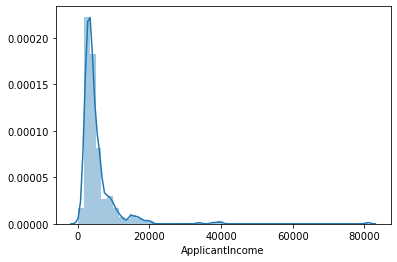

In [25]:
#df.ApplicantIncome.hist()
sns.distplot(df.ApplicantIncome)

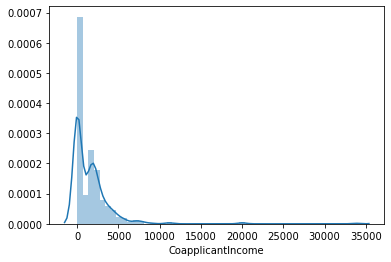

In [26]:
#df.CoapplicantIncome.hist()
sns.distplot(df.CoapplicantIncome)

In [27]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

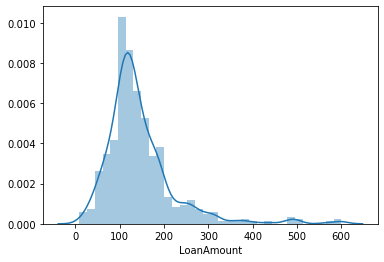

In [28]:
sns.distplot(df.LoanAmount)

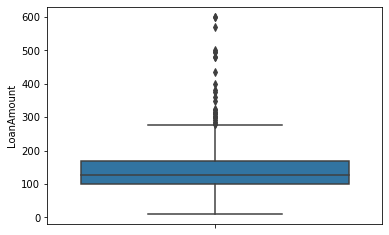

In [29]:
sns.boxplot(y=df.LoanAmount)

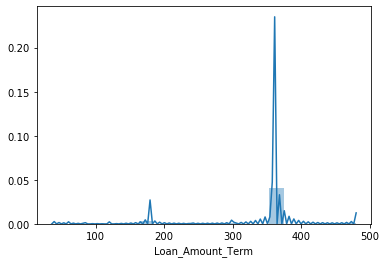

In [30]:
sns.distplot(df.Loan_Amount_Term)

In [31]:
df.Loan_Amount_Term.unique()

array([360., 120., 180.,  60., 300., 480., 240.,  36.,  84.])

In [32]:
df.Loan_Amount_Term.value_counts()

360.0    411
180.0     36
480.0     12
300.0      9
84.0       3
120.0      3
36.0       2
240.0      2
60.0       2
Name: Loan_Amount_Term, dtype: int64

In [33]:
df.Credit_History.value_counts()

1.0    410
0.0     70
Name: Credit_History, dtype: int64

In [34]:
df.Property_Area.unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [35]:
df.Property_Area.value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [36]:
df.Loan_Status.value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

# BiVariant Analysis

In [37]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [38]:
cont_var = []
for col,val in dict(df.dtypes).items():
    if val != 'object':
        cont_var.append(col)
cont_var
        
    

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

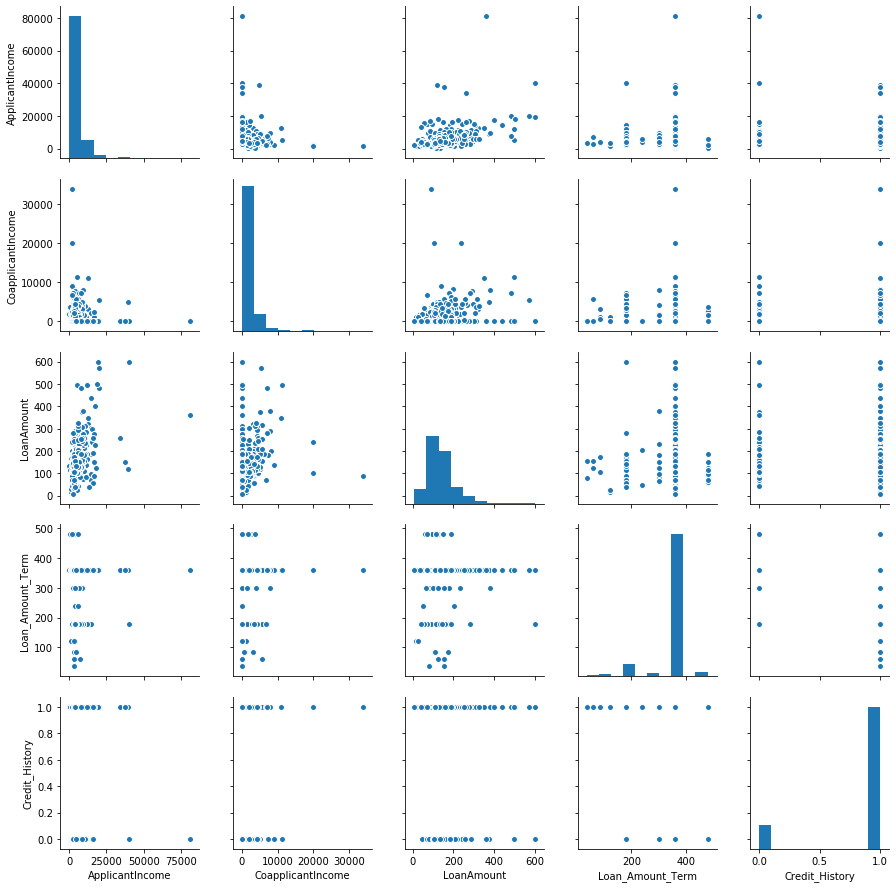

In [39]:
sns.pairplot(df)

In [40]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [41]:
df[["ApplicantIncome","Loan_Status"]].groupby("Loan_Status")["ApplicantIncome"].mean()

Loan_Status
N    5730.189189
Y    5201.093373
Name: ApplicantIncome, dtype: float64

Text(0, 0.5, 'Loan_amount')

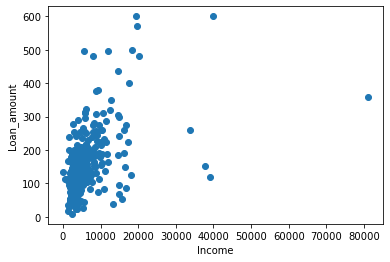

In [42]:
plt.scatter(df.ApplicantIncome,df.LoanAmount)
plt.xlabel('Income')
plt.ylabel('Loan_amount')


In [43]:
from scipy.stats import pearsonr, spearmanr
print('spearmanr',spearmanr(df.ApplicantIncome,df.LoanAmount)[0])

print('pearsonr',pearsonr(df.ApplicantIncome,df.LoanAmount)[0])

spearmanr 0.5212689283368801
pearsonr 0.49530958608655357


In [44]:
df['App_Coapp_Inc'] = df.ApplicantIncome + df.CoapplicantIncome

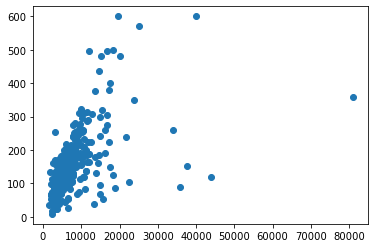

In [45]:
plt.scatter(df.App_Coapp_Inc,df.LoanAmount)

In [46]:
from scipy.stats import pearsonr, spearmanr
print('spearmanr',spearmanr(df.App_Coapp_Inc,df.LoanAmount)[0])

print('pearsonr',pearsonr(df.App_Coapp_Inc,df.LoanAmount)[0])

spearmanr 0.7050973822248088
pearsonr 0.55391385474627


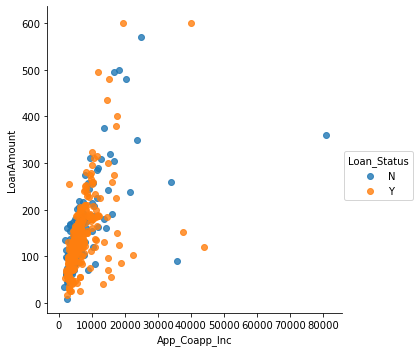

In [47]:
sns.lmplot(x="App_Coapp_Inc",y = "LoanAmount",data =df, hue="Loan_Status",fit_reg=False)

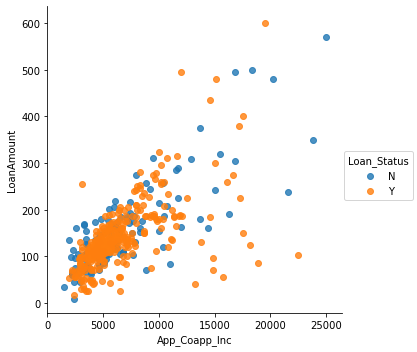

In [48]:
sns.lmplot(x="App_Coapp_Inc",y = "LoanAmount",data =df[df.App_Coapp_Inc  < 30000], hue="Loan_Status",fit_reg=False)

In [49]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'App_Coapp_Inc'],
      dtype='object')

In [50]:
df.Self_Employed.unique()

array(['No', 'Yes'], dtype=object)

In [51]:
df.groupby('Self_Employed')['Loan_Status'].value_counts()/df.groupby('Self_Employed')['Loan_Status'].count()

Self_Employed  Loan_Status
No             Y              0.698068
               N              0.301932
Yes            Y              0.651515
               N              0.348485
Name: Loan_Status, dtype: float64

In [52]:
df.groupby('Self_Employed')['Loan_Status'].value_counts()

Self_Employed  Loan_Status
No             Y              289
               N              125
Yes            Y               43
               N               23
Name: Loan_Status, dtype: int64

In [53]:
df.groupby('Self_Employed')['Loan_Status'].count()

Self_Employed
No     414
Yes     66
Name: Loan_Status, dtype: int64

In [54]:
##Education is important or not 

In [55]:
df.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [56]:
df.groupby('Education')['Loan_Status'].value_counts()/df.groupby('Education')['Loan_Status'].count()

Education     Loan_Status
Graduate      Y              0.707572
              N              0.292428
Not Graduate  Y              0.628866
              N              0.371134
Name: Loan_Status, dtype: float64

In [57]:
df.groupby('Gender')['Loan_Status'].value_counts()/df.groupby('Gender')['Loan_Status'].count()

Gender  Loan_Status
Female  Y              0.627907
        N              0.372093
Male    Y              0.705584
        N              0.294416
Name: Loan_Status, dtype: float64

In [58]:
df.groupby('Married')['Loan_Status'].value_counts()/df.groupby('Married')['Loan_Status'].count()

Married  Loan_Status
No       Y              0.621302
         N              0.378698
Yes      Y              0.729904
         N              0.270096
Name: Loan_Status, dtype: float64

In [59]:
df.groupby('Credit_History')['Loan_Status'].value_counts()/df.groupby('Credit_History')['Loan_Status'].count()

Credit_History  Loan_Status
0.0             N              0.900000
                Y              0.100000
1.0             Y              0.792683
                N              0.207317
Name: Loan_Status, dtype: float64

In [60]:
df.groupby('Dependents')['Loan_Status'].value_counts()/df.groupby('Dependents')['Loan_Status'].count()

Dependents  Loan_Status
0           Y              0.682482
            N              0.317518
1           Y              0.650000
            N              0.350000
2           Y              0.764706
            N              0.235294
3+          Y              0.682927
            N              0.317073
Name: Loan_Status, dtype: float64

In [61]:
df.groupby('Dependents')['ApplicantIncome'].mean()

Dependents
0     4768.167883
1     6267.837500
2     5151.529412
3+    8025.512195
Name: ApplicantIncome, dtype: float64

In [62]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'App_Coapp_Inc'],
      dtype='object')

In [63]:
df.groupby('Loan_Amount_Term')['Loan_Status'].value_counts()/df.groupby('Loan_Amount_Term')['Loan_Status'].count()

Loan_Amount_Term  Loan_Status
36.0              N              1.000000
60.0              Y              1.000000
84.0              Y              0.666667
                  N              0.333333
120.0             Y              1.000000
180.0             Y              0.666667
                  N              0.333333
240.0             N              0.500000
                  Y              0.500000
300.0             N              0.555556
                  Y              0.444444
360.0             Y              0.710462
                  N              0.289538
480.0             N              0.666667
                  Y              0.333333
Name: Loan_Status, dtype: float64

In [64]:
from scipy.stats import pearsonr, spearmanr
print('spearmanr',spearmanr(df.ApplicantIncome,df.CoapplicantIncome)[0])

print('pearsonr',pearsonr(df.ApplicantIncome,df.CoapplicantIncome)[0])

spearmanr -0.3097285216849437
pearsonr -0.11258796933156676


In [65]:
df.groupby('Property_Area')['Loan_Status'].value_counts()/df.groupby('Property_Area')['Loan_Status'].count()

Property_Area  Loan_Status
Rural          Y              0.611511
               N              0.388489
Semiurban      Y              0.780105
               N              0.219895
Urban          Y              0.653333
               N              0.346667
Name: Loan_Status, dtype: float64

# Data Cleaning 

In [66]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'App_Coapp_Inc'],
      dtype='object')

In [67]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [68]:
def data_cleaning(df):
    df.Gender = df.Gender.map(lambda x : 1 if x =='Male' else 0)
    df.Married = df.Married.map(lambda x : 1 if x =='Yes' else 0)
    df.Dependents = df.Dependents.map(lambda x : 3 if x =='3+' else int(x))
    ##df['App_Coapp_Inc'] = df.ApplicantIncome + df.CoapplicantIncome
    df.Education = df.Education.map(lambda x : 1 if x =='Graduate' else 0)
    df.Self_Employed = df.Self_Employed.map(lambda x : 1 if x =='Yes' else 0)
    df = pd.concat([df,pd.get_dummies(df.Property_Area,prefix='PA_')],axis=1)
    y = df.Loan_Status.map(lambda x : 1 if x =='Y' else 0 )
    df.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Property_Area','Loan_Status'],axis=1,inplace=True)
    return df,y
    

In [69]:
X,y = data_cleaning(df.copy())

In [70]:
X.shape

(480, 10)

In [71]:
y.shape

(480,)

In [72]:
X.Gender.value_counts()

1    394
0     86
Name: Gender, dtype: int64

In [73]:
y.shape

(480,)

In [74]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,App_Coapp_Inc,PA__Rural,PA__Semiurban,PA__Urban
1,1,1,1,1,0,1.0,6091.0,1,0,0
2,1,1,0,1,1,1.0,3000.0,0,0,1
3,1,1,0,0,0,1.0,4941.0,0,0,1
4,1,0,0,1,0,1.0,6000.0,0,0,1
5,1,1,2,1,1,1.0,9613.0,0,0,1


In [75]:
for col in ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','PA__Rural','PA__Semiurban','PA__Urban']:
    print(X.eval(col).value_counts())

1    394
0     86
dtype: int64
1    311
0    169
dtype: int64
0    274
2     85
1     80
3     41
dtype: int64
1    383
0     97
dtype: int64
0    414
1     66
dtype: int64
1.0    410
0.0     70
dtype: int64
0    341
1    139
dtype: int64
0    289
1    191
dtype: int64
0    330
1    150
dtype: int64


In [76]:
X.shape,y.shape

((480, 10), (480,))

In [77]:
log_reg = LogisticRegression()

In [78]:
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
log_reg.score(X,y)

0.8104166666666667

In [80]:
y_hat = log_reg.predict(X)

In [81]:
c = 0
for i,j in zip(y,y_hat):
    if i==j:
        c+=1
print(c/len(y))

0.8104166666666667


In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
confusion_matrix(y,y_hat)

array([[ 64,  84],
       [  7, 325]])

In [84]:
from sklearn.metrics import roc_auc_score

In [85]:
roc_auc_score(y,y_hat)

0.7056740475415174

In [86]:
def data_cleaning2(df):
    df.dropna(inplace=True)
    df.Gender = df.Gender.map(lambda x : 1 if x =='Male' else 0)
    df.Married = df.Married.map(lambda x : 1 if x =='Yes' else 0)
    df.Dependents = df.Dependents.map(lambda x : 3 if x =='3+' else int(x))
    df['App_Coapp_Inc'] = df.ApplicantIncome + df.CoapplicantIncome
    df.Education = df.Education.map(lambda x : 1 if x =='Graduate' else 0)
    df.Self_Employed = df.Self_Employed.map(lambda x : 1 if x =='Yes' else 0)
    df = pd.concat([df,pd.get_dummies(df.Property_Area,prefix='PA_')],axis=1)
    y = df.Loan_Status.map(lambda x : 1 if x =='Y' else 0 )
    df.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Property_Area','Loan_Status'],axis=1,inplace=True)
    return df,y
    

In [87]:
df2 = pd.read_csv('loan.csv')
df_y = df2.pop('Loan_Status')
df_X = df2.copy()
df_X.dropna(inplace=True)
df_X.shape,df_y.shape

((480, 12), (614,))

In [88]:
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [89]:
##Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import sys
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

##Instantiation

logr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svmc = SVC()
knnc = KNeighborsClassifier()
nbc = GaussianNB()
#xgbc = XGBClassifier()


##Creating a dictionary of all models
model_dict = {'LogisticRegression'     : logr,
              'DecisionTreeClassifier' : dtc,
              'RandomForestClassifier' : rfc,
              'SVM'                    : svmc,
              'KNeighborsClassifier'   : knnc,
              'GaussianNB'             : nbc

             }

##logr.fit(df_X,df_y)

In [90]:
for model_name,model in model_dict.items():
    try: 
        model.fit(df_X,df_y)
    except Exception as e:
        print(model_name,':',e, file=sys.stderr)
        

LogisticRegression : could not convert string to float: 'Semiurban'
DecisionTreeClassifier : could not convert string to float: 'LP001003'
RandomForestClassifier : could not convert string to float: 'LP001003'
SVM : could not convert string to float: 'Semiurban'
KNeighborsClassifier : could not convert string to float: 'LP001003'
GaussianNB : could not convert string to float: 'LP001003'


In [91]:
df3 = pd.read_csv('loan.csv')
X_cln,y_cln = data_cleaning2(df3.copy())
X_train, X_test, y_train, y_test = train_test_split(X_cln,y_cln)
print(X_cln.shape,y_cln.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(480, 10) (480,)
(360, 10) (120, 10) (360,) (120,)


In [92]:
X_cln.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,App_Coapp_Inc,PA__Rural,PA__Semiurban,PA__Urban
1,1,1,1,1,0,1.0,6091.0,1,0,0
2,1,1,0,1,1,1.0,3000.0,0,0,1
3,1,1,0,0,0,1.0,4941.0,0,0,1
4,1,0,0,1,0,1.0,6000.0,0,0,1
5,1,1,2,1,1,1.0,9613.0,0,0,1


In [93]:
for model_name,model in model_dict.items():
    print(model_name)
    model.fit(X_train,y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test  = model.predict(X_test)
    print('train_accuracy',roc_auc_score(y_train,y_hat_train))
    print('test_accuracy',roc_auc_score(y_test,y_hat_test))
    #print('confusion_matrix_train','\n',confusion_matrix(y_train,y_hat_train))
    #print('confusion_matrix_test','\n',confusion_matrix(y_test,y_hat_test))
    print()


LogisticRegression
train_accuracy 0.6944444444444444
test_accuracy 0.725

DecisionTreeClassifier
train_accuracy 0.996031746031746
test_accuracy 0.7125000000000001

RandomForestClassifier
train_accuracy 0.9576719576719578
test_accuracy 0.75625

SVM
train_accuracy 0.921957671957672
test_accuracy 0.47500000000000003

KNeighborsClassifier
train_accuracy 0.6283068783068784
test_accuracy 0.54375

GaussianNB
train_accuracy 0.7003968253968254
test_accuracy 0.7625



# Hyperparameter Tuning

In [94]:
param_grid_logr = {'penalty' : ['l1', 'l2'],
    'solver' : ['liblinear'], 'max_iter' :[1,10,25,50,75,100]}
logr_cv_best_model = GridSearchCV(LogisticRegression(),param_grid_logr,cv =5)
logr_cv_best_model.fit(X_train,y_train)
print(logr_cv_best_model.best_params_)
print(logr_cv_best_model.best_score_)
print(roc_auc_score(y_test,logr_cv_best_model.predict(X_test)))

{'max_iter': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.8055555555555556
0.725


In [95]:
param_grid_dtc = {'criterion' : ['gini', 'entropy'],
                'max_depth' : [3,4,5,6,7], 
                'min_samples_split' : [2,3,4,5],
                'min_samples_leaf'  : [1,2,3,4],
                'max_features' :['sqrt','log2']
               }
dtc_cv_best_model = GridSearchCV(DecisionTreeClassifier(),param_grid_dtc,cv =5)
dtc_cv_best_model.fit(X_train,y_train)
print(dtc_cv_best_model.best_params_)
print(dtc_cv_best_model.best_score_)
print(roc_auc_score(y_test,dtc_cv_best_model.predict(X_test)))

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3}
0.8111111111111111
0.725


In [96]:
param_grid_rfc = {'criterion' : ['gini', 'entropy'],
                'max_depth' : [4,5], 
                'min_samples_split' : [2,3],
                'min_samples_leaf'  : [1,2],
                'max_features' :['sqrt','log2'],
                'n_estimators' : [10,20]
               }
rfc_cv_best_model = GridSearchCV(RandomForestClassifier(),param_grid_rfc,cv =5)
rfc_cv_best_model.fit(X_train,y_train)
print(rfc_cv_best_model.best_params_)
print(rfc_cv_best_model.best_score_)
print(roc_auc_score(y_test,rfc_cv_best_model.predict(X_test)))

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 10}
0.8138888888888889
0.73125


In [97]:
y_train.value_counts(), y_test.value_counts()

(1    252
 0    108
 Name: Loan_Status, dtype: int64, 1    80
 0    40
 Name: Loan_Status, dtype: int64)

In [98]:
def data_cleaning3(df):
    df.dropna(inplace=True)
    df.Gender = df.Gender.map(lambda x : 1 if x =='Male' else 0)
    df.Married = df.Married.map(lambda x : 1 if x =='Yes' else 0)
    df = pd.concat([df,pd.get_dummies(df.Dependents,prefix='Dep_')],axis=1)
    df.Education = df.Education.map(lambda x : 1 if x =='Graduate' else 0)
    df.Self_Employed = df.Self_Employed.map(lambda x : 1 if x =='Yes' else 0)
    df = pd.concat([df,pd.get_dummies(df.Property_Area,prefix='PA_')],axis=1)
    y = df.Loan_Status.map(lambda x : 1 if x =='Y' else 0 )
    df.drop(['Loan_ID','LoanAmount','Dependents','Loan_Amount_Term','Property_Area','Loan_Status'],axis=1,inplace=True)
    return df,y

In [99]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'App_Coapp_Inc'],
      dtype='object')

In [100]:
df4 = pd.read_csv('loan.csv')
X_cln,y_cln = data_cleaning3(df4.copy())
X_train, X_test, y_train, y_test = train_test_split(X_cln,y_cln)
print(X_cln.shape,y_cln.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(480, 14) (480,)
(360, 14) (120, 14) (360,) (120,)


In [101]:
for model_name,model in model_dict.items():
    print(model_name)
    model.fit(X_train,y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test  = model.predict(X_test)
    print('train_accuracy',roc_auc_score(y_train,y_hat_train))
    print('test_accuracy',roc_auc_score(y_test,y_hat_test))
    #print('confusion_matrix_train','\n',confusion_matrix(y_train,y_hat_train))
    #print('confusion_matrix_test','\n',confusion_matrix(y_test,y_hat_test))
    print()

LogisticRegression
train_accuracy 0.6843317972350231
test_accuracy 0.7579365079365079

DecisionTreeClassifier
train_accuracy 0.9959677419354839
test_accuracy 0.5833333333333333

RandomForestClassifier
train_accuracy 0.9655817972350231
test_accuracy 0.6369047619047619

SVM
train_accuracy 0.9622695852534563
test_accuracy 0.501984126984127

KNeighborsClassifier
train_accuracy 0.652073732718894
test_accuracy 0.5119047619047619

GaussianNB
train_accuracy 0.6941244239631337
test_accuracy 0.7698412698412699



In [102]:
def data_cleaning4(df):
    df.dropna(inplace=True)
    df.Gender = df.Gender.map(lambda x : 1 if x =='Male' else 0)
    df.Married = df.Married.map(lambda x : 1 if x =='Yes' else 0)
    df = pd.concat([df,pd.get_dummies(df.Dependents,prefix='Dep_')],axis=1)
    df.Education = df.Education.map(lambda x : 1 if x =='Graduate' else 0)
    df['App_Coapp_Inc'] = df.ApplicantIncome + df.CoapplicantIncome
    df.Self_Employed = df.Self_Employed.map(lambda x : 1 if x =='Yes' else 0)
    df = pd.concat([df,pd.get_dummies(df.Property_Area,prefix='PA_')],axis=1)
    y = df.Loan_Status.map(lambda x : 1 if x =='Y' else 0 )
    df.drop(['Loan_ID','LoanAmount','ApplicantIncome','CoapplicantIncome','Dependents','Loan_Amount_Term','Property_Area','Loan_Status'],axis=1,inplace=True)
    return df,y

In [103]:
df5 = pd.read_csv('loan.csv')
X_cln,y_cln = data_cleaning4(df5.copy())
X_train, X_test, y_train, y_test = train_test_split(X_cln,y_cln)
print(X_cln.shape,y_cln.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(480, 13) (480,)
(360, 13) (120, 13) (360,) (120,)


In [104]:
for model_name,model in model_dict.items():
    print(model_name)
    model.fit(X_train,y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test  = model.predict(X_test)
    print('train_accuracy',roc_auc_score(y_train,y_hat_train))
    print('test_accuracy',roc_auc_score(y_test,y_hat_test))
    #print('confusion_matrix_train','\n',confusion_matrix(y_train,y_hat_train))
    #print('confusion_matrix_test','\n',confusion_matrix(y_test,y_hat_test))
    print()

LogisticRegression
train_accuracy 0.7001728110599079
test_accuracy 0.7222222222222222

DecisionTreeClassifier
train_accuracy 0.9959677419354839
test_accuracy 0.625

RandomForestClassifier
train_accuracy 0.9586693548387097
test_accuracy 0.638888888888889

SVM
train_accuracy 0.9220910138248848
test_accuracy 0.4642857142857143

KNeighborsClassifier
train_accuracy 0.6967165898617511
test_accuracy 0.5059523809523809

GaussianNB
train_accuracy 0.7173099078341014
test_accuracy 0.7182539682539683



In [105]:
for col,imp in zip(X_train.columns,rfc.feature_importances_):
    print('{}:{}'.format(col,np.round(imp,decimals=2)))

Gender:0.02
Married:0.04
Education:0.04
Self_Employed:0.03
Credit_History:0.26
Dep__0:0.02
Dep__1:0.02
Dep__2:0.02
Dep__3+:0.01
App_Coapp_Inc:0.46
PA__Rural:0.02
PA__Semiurban:0.03
PA__Urban:0.02


In [106]:
def data_cleaning5(df):
    df.dropna(inplace=True)
    df.Gender = df.Gender.map(lambda x : 1 if x =='Male' else 0)
    df.Married = df.Married.map(lambda x : 1 if x =='Yes' else 0)
    df.Education = df.Education.map(lambda x : 1 if x =='Graduate' else 0)
    df.Self_Employed = df.Self_Employed.map(lambda x : 1 if x =='Yes' else 0)
    df['App_Coapp_Inc'] = df.ApplicantIncome + df.CoapplicantIncome
    y = df.Loan_Status.map(lambda x : 1 if x =='Y' else 0 )
    df.drop(['Loan_ID', 'Dependents',  'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Property_Area', 'Loan_Status',],axis=1,inplace=True)
    return df,y

In [107]:
df6 = pd.read_csv('loan.csv')
X_cln,y_cln = data_cleaning5(df6.copy())
X_train, X_test, y_train, y_test = train_test_split(X_cln,y_cln)
print(X_cln.shape,y_cln.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(480, 6) (480,)
(360, 6) (120, 6) (360,) (120,)


In [108]:
for model_name,model in model_dict.items():
    print(model_name)
    model.fit(X_train,y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test  = model.predict(X_test)
    print('train_accuracy',roc_auc_score(y_train,y_hat_train))
    print('test_accuracy',roc_auc_score(y_test,y_hat_test))
    #print('confusion_matrix_train','\n',confusion_matrix(y_train,y_hat_train))
    #print('confusion_matrix_test','\n',confusion_matrix(y_test,y_hat_test))
    print()

LogisticRegression
train_accuracy 0.6811082584510055
test_accuracy 0.7619699042407662

DecisionTreeClassifier
train_accuracy 0.9898373983739837
test_accuracy 0.7099863201094392

RandomForestClassifier
train_accuracy 0.9331407787762089
test_accuracy 0.7158002735978113

SVM
train_accuracy 0.9213735558408215
test_accuracy 0.4972640218878249

KNeighborsClassifier
train_accuracy 0.670517757809157
test_accuracy 0.5099179206566348

GaussianNB
train_accuracy 0.6884895164741122
test_accuracy 0.7766757865937073



In [125]:
from sklearn.metrics import confusion_matrix,precision_score, recall_score, classification_report, f1_score

In [124]:
print(y_test.value_counts())
print(confusion_matrix(y_test,y_hat_test,labels=[1,0]))

1    86
0    34
Name: Loan_Status, dtype: int64
[[83  3]
 [14 20]]


In [122]:
y_test.shape, y_hat_test.shape

((120,), (120,))

In [130]:
print('precision_score',precision_score(y_test,y_hat_test))
print('recall_score',recall_score(y_test,y_hat_test))
print('f1_score',f1_score(y_test,y_hat_test))
print('classification_report','\n',classification_report(y_test,y_hat_test))

precision_score 0.8556701030927835
recall_score 0.9651162790697675
f1_score 0.907103825136612
classification_report 
              precision    recall  f1-score   support

          0       0.87      0.59      0.70        34
          1       0.86      0.97      0.91        86

avg / total       0.86      0.86      0.85       120



In [131]:
##Probability Caliberation
logr.predict(X_test)

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [144]:
y_hat_th = []
for i in logr.predict_proba(X_test)[:,1]:
    if i < 0.7:
        y_hat_th.append(0)
    else :
        y_hat_th.append(1)
        
        

In [146]:
np.array(y_hat_th)

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1])

In [147]:
print('precision_score',precision_score(y_test,y_hat_th))
print('recall_score',recall_score(y_test,y_hat_th))
print('f1_score',f1_score(y_test,y_hat_th))
print('classification_report','\n',classification_report(y_test,y_hat_th))

precision_score 0.8395061728395061
recall_score 0.7906976744186046
f1_score 0.8143712574850299
classification_report 
              precision    recall  f1-score   support

          0       0.54      0.62      0.58        34
          1       0.84      0.79      0.81        86

avg / total       0.75      0.74      0.75       120



In [154]:
df.shape

(480, 14)

In [156]:
df6 = pd.read_csv('loan.csv')

In [157]:
df6.shape

(614, 13)

In [158]:
df6.index

RangeIndex(start=0, stop=614, step=1)

In [159]:
df.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            603, 604, 606, 607, 608, 609, 610, 611, 612, 613],
           dtype='int64', length=480)

In [162]:
test_index = df6.index.difference(df.index)

In [163]:
test_index.shape

(134,)

In [193]:
holdout = df6.loc[test_index]

In [194]:
holdout.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [195]:
holdout.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [196]:
holdout.Gender = holdout.Gender.fillna('Male')
holdout.Married = holdout.Married.fillna('Yes')
holdout.Dependents = holdout.Dependents.fillna('0')
holdout.Self_Employed = holdout.Self_Employed.fillna('No')
holdout.LoanAmount = holdout.LoanAmount.fillna(df6.LoanAmount.median())
holdout.Loan_Amount_Term = holdout.LoanAmount.fillna(df6.Loan_Amount_Term.median())
holdout.Credit_History = holdout.Credit_History.fillna('1.0')


In [197]:
holdout.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [198]:
df6.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [199]:
X_holdout,y_holdout = data_cleaning5(holdout.copy())

In [200]:
X_holdout.shape,y_holdout.shape

((134, 6), (134,))

In [201]:
logr.predict(X_holdout)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1])

In [204]:
''' Page 1 Introduction and Approach - Problem Statement 
    Page 2 Data Description , Null Values 
    Page 3 EDA - Multiple slides - Learned about the data sets 
    Page 4 Summary of EDA
    Page 5 Modelling Approach [Raw Data -> Data Cleaning -> Test Train -> Model -> Validate Model -> Test Set -> Productionize]
    Page 6 Accuracy, Confusion Matrix, Recall, Precision from Both classes
    Page 7 Inference from Model, In which scenarios, Model will work well.
    
    
    '''

' Page 1 Introduction and Approach - Problem Statement \n    Page 2 Data Description , Null Values \n    Page 3 EDA - Multiple slides - Learned about the data sets \n    Page 4 Summary of EDA\n    Page 5 Modelling Approach [Raw Data -> Data Cleaning -> Test Train -> Model -> Validate Model -> Test Set -> Productionize]\n    Page 6 Accuracy, Confusion Matrix, Recall, Precision from Both classes\n    Page 7 Inference from Model, In which scenarios, Model will work well.\n    \n    \n    '

In [207]:
- (.55 * np.log2(.55) + .45 * np.log2(.45))

0.9927744539878083

In [215]:
def  entropy(p):
    e = -(p*np.log2(p) + (1-p)* np.log2(1-p))
    return e

In [216]:
entropy(.9999)

0.0014730335283280294

In [221]:
x = np.linspace(0, 1, num=50)

In [222]:
y = entropy(x)

In [224]:
x,y

(array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
        0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
        0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
        0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
        0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
        0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
        0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
        0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
        0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
        0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ]),
 array([       nan, 0.14372617, 0.24602258, 0.33228663, 0.40790598,
        0.47543165, 0.53635965, 0.59167278, 0.64206429, 0.68804762,
        0.73001663, 0.76828141, 0.80309098, 0.83464829, 0.86312057,
        0.88864667, 0.91134238, 0.93130437, 0.9486132 , 0.96333555,
        0.97552595, 0.98522814, 0.992476  , 0.

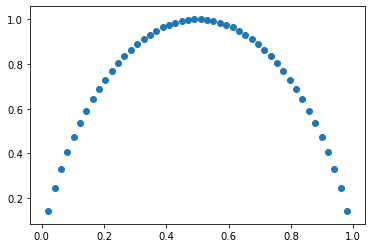

In [232]:
plt.scatter(x,y)

In [230]:
entropy(.99999)

0.00018052328301750936